**BUSINESS UNDERSTANDING**
To get deep insights from the 2020 Stack Overflow Survey. 
To answer business questions using data visualization, machine learning methods. 

**DATA UNDERSTANDING**
1. Import data frame;
2. Obtain number of rows and columns;
3. Investigate the number of columns with missing values;

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import UdacityProjectOne as t
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import seaborn as sns
%matplotlib inline

df = pd.read_csv('./survey_results_public_2020.csv')
#schema = pd.read_csv('./survey_results_public_schema_2020.csv') #question for each column
df.head()

ModuleNotFoundError: No module named 'UdacityProjectOne'

In [3]:
#provide the number of rows and columns in the dataset
num_rows = df.shape[0] 
num_cols = df.shape[1]
num_rows
num_cols

61

In [4]:
#provide a set of columns with 0 missing values
no_nulls =set(df.columns[df.isnull().mean()==0])
no_nulls

{'Respondent'}

In [5]:
#provide a set of columns with more than 25% of the values missing
most_missing_cols = set(df.columns[df.isnull().mean()>0.25])
most_missing_cols

{'Age',
 'CompFreq',
 'CompTotal',
 'ConvertedComp',
 'CurrencyDesc',
 'CurrencySymbol',
 'DatabaseDesireNextYear',
 'Ethnicity',
 'JobSat',
 'MiscTechDesireNextYear',
 'MiscTechWorkedWith',
 'NEWCollabToolsDesireNextYear',
 'NEWDevOps',
 'NEWDevOpsImpt',
 'NEWJobHunt',
 'NEWJobHuntResearch',
 'NEWOnboardGood',
 'NEWOvertime',
 'NEWPurchaseResearch',
 'OrgSize',
 'PurchaseWhat',
 'SOPartFreq',
 'Sexuality',
 'WebframeDesireNextYear',
 'WebframeWorkedWith',
 'WorkWeekHrs',
 'YearsCodePro'}

**DATA PREPARATION**
1. Make bar plots for "MainBranch": developer professions, and "EdLevel": educational level;
2. Make histograph plot of columns "Age", "CompTotal", "CovertedComp","WorkweekHrs";
3. Make heatmap plot of columns  "Age", "CompTotal", "CovertedComp","WorkweekHrs".

In [6]:
def barplot(column_name):
    '''
    This function provide the counts for the each series in a column and plot it in bar plot
    
    Input:
    column_name
    
    Output: 
    plt bar plot of value counts
    
    '''
    vals = df[column_name].value_counts()
    (vals/df.shape[0]).plot(kind="bar")
    plt.title(column_name)
    

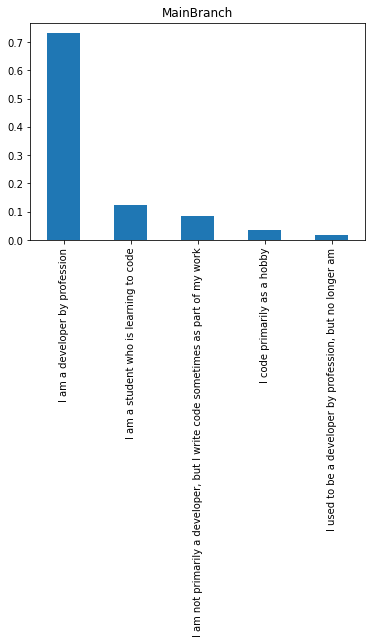

In [7]:
barplot('MainBranch')

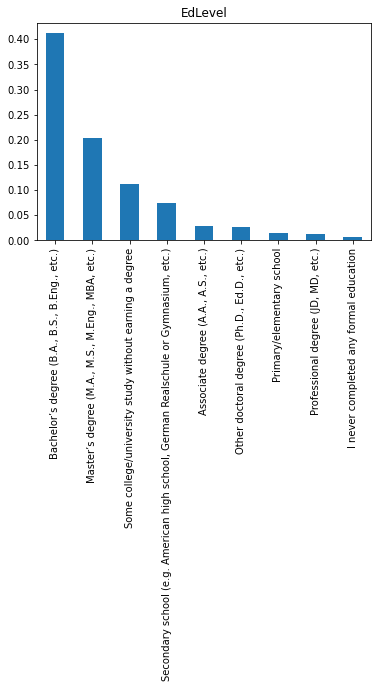

In [8]:
barplot('EdLevel')

In [9]:
df.describe() #all the numeric columns and their statistics summary

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029F8D47A9D0>,
      dtype=object)

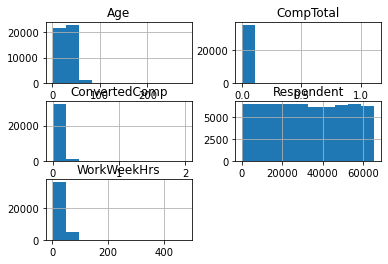

In [10]:
df.hist() #hist plot

In [11]:
df.shape#total number of rows and clomuns

(64461, 61)

**Question One: What are the current top 5 popular programming languages? And What are the top 5 programming languages in the future?**

In [54]:
#List the top 5 programming languages for developers worked with last year
language1 = df['LanguageWorkedWith'].value_counts() 
language1.head()

HTML/CSS;JavaScript;PHP;SQL              1073
HTML/CSS;JavaScript                       900
C#;HTML/CSS;JavaScript;SQL                856
C#;HTML/CSS;JavaScript;SQL;TypeScript     754
HTML/CSS;JavaScript;TypeScript            697
Name: LanguageWorkedWith, dtype: int64

In [12]:
possible_vals = ["HTML/CSS; JavaScript;PHP;SQL", "HTML/CSS;JavaScript", 
                 "C#;HTML/CSS;JavaScript;SQL", "C#;HTML/CSS;JavaScript;SQL;TypeScript",
                 "HTML/CSS;JavaScript;TypeScript", "Other"]

def clean_and_plot(df, title='Most popular programming language', plot=True):
    '''
    INPUT 
        df - a dataframe holding the LanguageWorkedWith column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the LanguageWorkedWith column.
    '''
    study = df['LanguageWorkedWith'].value_counts().reset_index()
    study.rename(columns={'index': 'method', 'LanguageWorkedWith': 'count'}, inplace=True)
    study_df = t.total_count(study, 'method', 'count', possible_vals)

    study_df.set_index('method', inplace=True)
    if plot:
        (study_df/study_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df

props_df = clean_and_plot(df)

AttributeError: 'DataFrame' object has no attribute 'total_count'

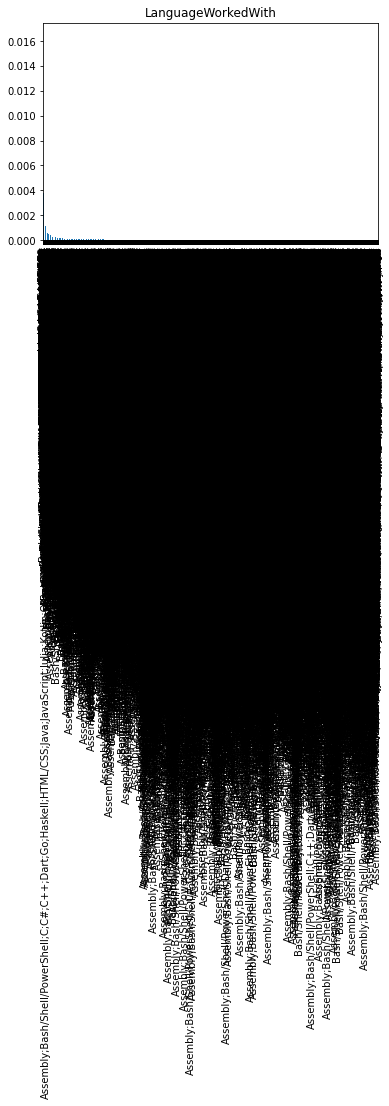

In [24]:
barplot('LanguageWorkedWith')

In [26]:
#list the top 5 programming languages developers recommend for the next year
language2 = df['LanguageDesireNextYear'].value_counts()
language2.head()

Python                            1152
Rust                               528
HTML/CSS;JavaScript;TypeScript     499
C#                                 461
Go                                 412
Name: LanguageDesireNextYear, dtype: int64

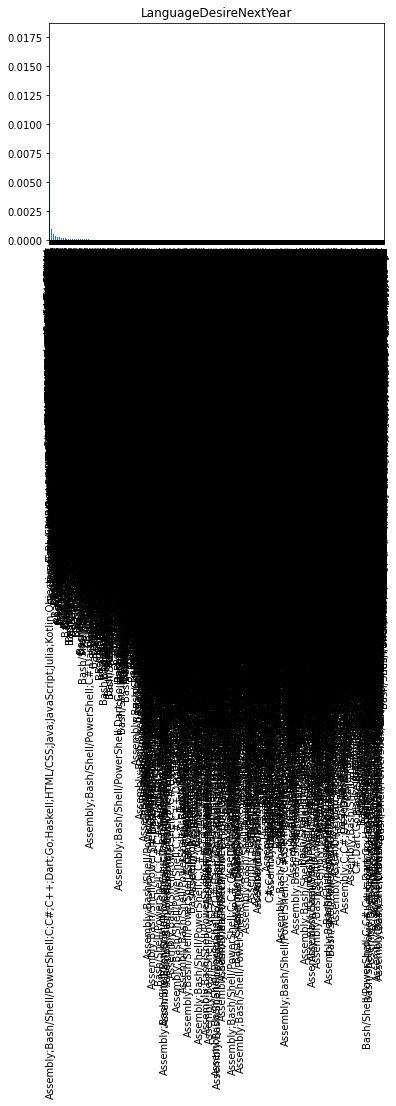

In [27]:
barplot('LanguageDesireNextYear')

In [28]:
#List new learn languages (not in use for this post)
language3 = df['NEWLearn'].value_counts()
language3.head()

Every few months        20938
Once a year             20693
Once every few years    13284
Once a decade            1241
Name: NEWLearn, dtype: int64

**Question Two: is there any relation between age and salary, weekly working hours and salary?**

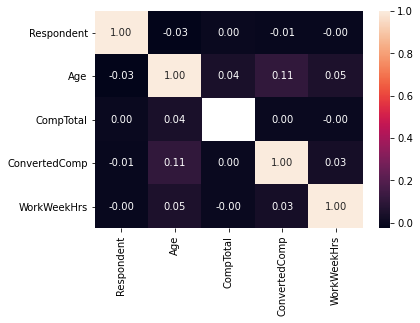

In [30]:
#heatmap plot between columns "Respondent", "Age", "CompTotal", "ConvertedComp","WorkWeekHrs"
sns.heatmap(df.corr(), annot=True, fmt='.2f')

**Qustion Three: Can we build a linear regression model to predict the salary?**

In [35]:
#drop the NaN values 
#drop the NaN values is a quick way to get the data ready for machine learning modeling
#(the sklearn will result in errors so model will not be constructed)
num_vars = df[['Age','CompTotal','ConvertedComp','WorkWeekHrs']]
df_dropna = num_vars.dropna(axis=0)

In [36]:
#split the data into explanatory and response variables
X = df_dropna[['Age','ConvertedComp','WorkWeekHrs']]
y = df_dropna['CompTotal']

In [37]:
#drop the NaN values (the sklearn will result in errors so model will not be constructed)
num_vars = df[['Age','CompTotal','ConvertedComp','WorkWeekHrs']]
df_dropna = num_vars.dropna(axis=0)

X = df_dropna[['Age','ConvertedComp','WorkWeekHrs']]
y = df_dropna['CompTotal']

#build the linear regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train)

#Model validation: 
y_test_preds = lm_model.predict(X_test)

print(r2_score(y_test, y_test_preds))
print(mean_squared_error(y_test, y_test_preds))

-2.0844157589456897e+76
1.784543165147552e+91


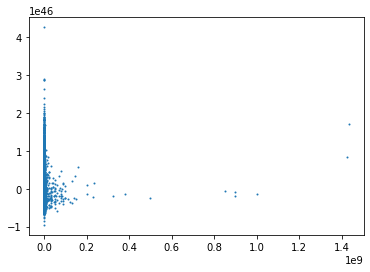

In [40]:
plt.scatter(y_test, y_test_preds, 1)